#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Ingestion

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Rinex-AI/MinorProject.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Data Visualisation

In [ ]:
sns.pairplot(df)

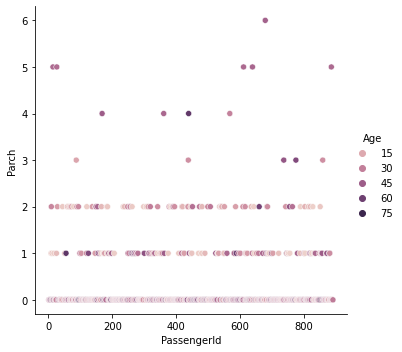

In [ ]:
sns.relplot(x='PassengerId',y='Parch',hue='Age',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


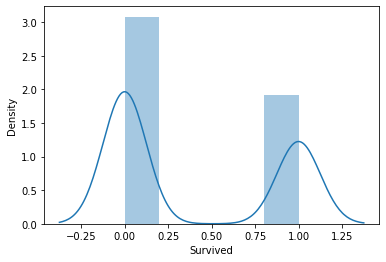

In [ ]:
sns.distplot(df['Survived'])

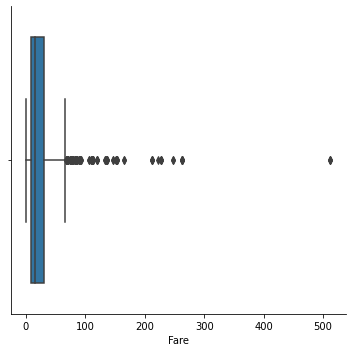

In [ ]:
sns.catplot(x='Fare',kind='box',data=df)

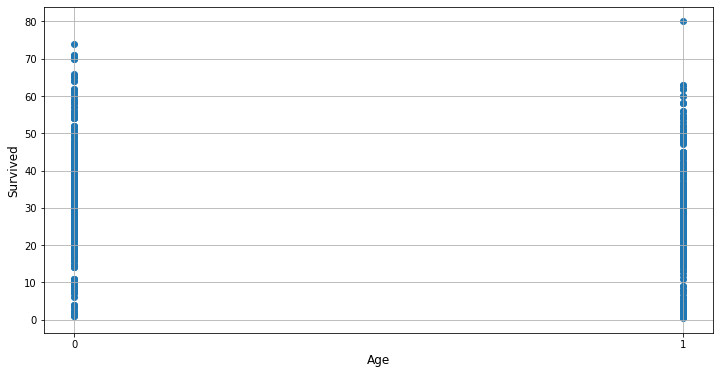

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['Survived'],df['Age'])
plt.xlabel("Age",fontsize=12)
plt.ylabel("Survived",fontsize=12)
plt.grid()
plt.xticks(np.arange(0,1.1))
plt.show()

#Data Preprocessing

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop('Name',axis='columns', inplace=True) #because it is of object type
df.drop('Cabin',axis='columns', inplace=True) #because it is of object type and a lot of missing values

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

Handling of missing data

(1)Drop the rows which have missing values

(2)Drop the columns which have missing values

(3)Fill the missing values with Zero

(4)Fill the missing values with mean or median or mode

(5)Fill the missing values with some advanced data analysis methods

In [ ]:
df['Age'].fillna(df.groupby(['Pclass'])['Age'].transform('mean'), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#Encoding

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [ ]:
df['Ticket'].value_counts() #Not possible to encode

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
df['Embarked'].fillna(df.groupby(['Pclass'])['Embarked'].transform('mean'), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


#Finding Patterns

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.00000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,1,38.00000,1,0,PC 17599,71.2833,1.0
2,3,1,3,1,26.00000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,1,35.00000,1,0,113803,53.1000,0.0
4,5,0,3,0,35.00000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.00000,0,0,211536,13.0000,0.0
887,888,1,1,1,19.00000,0,0,112053,30.0000,0.0
888,889,0,3,1,25.14062,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,0,26.00000,0,0,111369,30.0000,1.0


In [ ]:
!pip install data-patterns --quiet

     |████████████████████████████████| 149 kB 6.5 MB/s 


In [ ]:
import data_patterns

In [ ]:
miner=data_patterns.PatternMiner(df)
df_patterns = miner.find({'name': 'Fare',
                          'pattern': '<',
                          'parameters': {"min_confidence": 0.5,
                                         "min_support": 2,
                                         "decimal": 8}})
df_results = miner.analyze(df)
print(df_results)

100%|██████████| 27/27 [00:01<00:00, 15.34it/s]

       result_type pattern_id  cluster  support  exceptions  confidence  \
index                                                                     
1             True       Fare        0      342           0         1.0   
2             True       Fare        0      342           0         1.0   
3             True       Fare        0      342           0         1.0   
8             True       Fare        0      342           0         1.0   
9             True       Fare        0      342           0         1.0   
...            ...        ...      ...      ...         ...         ...   
875           True       Fare        0      247           0         1.0   
879           True       Fare        0      247           0         1.0   
885           True       Fare        0      247           0         1.0   
889           True       Fare        0      247           0         1.0   
890           True       Fare        0      247           0         1.0   

                        

#Link of the same: https://colab.research.google.com/drive/1RBUlJ6yVDLrOxbCmrdKqEIZN-dLQHv2d?usp=sharing